# Image Handling

In [1]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
! ls

__init__.py          gather_images.py     model.py
__pycache__          image-handling.ipynb s3
build_collection.py  imagenet             setup.py
data.py              images               wordnet


Build train/test sets

In [3]:
def get_label_tuples(files):
    """
    get named tuples of (tag, image)
    
    """
    tagged = []
    for img in files:
        tag = img.split('/')[1]
        tagged.append((tag, img))
        
    return tagged


In [4]:
def build_trainer(files, resize=False, size=[256, 256]):
    filename_queue = tf.train.string_input_producer(files, shuffle=False)  # queue for the file names

    file_reader = tf.WholeFileReader()  # file reader object for image files
    key, value = file_reader.read(filename_queue)  # read the files

    
    # TODO(@messiest) understand difference b/w decode_jpeg and decode_image
    img = tf.image.decode_jpeg(value, channels=3, try_recover_truncated = True, acceptable_fraction=0.05)  # decode image file
    img = tf.image.convert_image_dtype(img, tf.float32)  # cast to tf.float32
    
    if resize:
        img = tf.image.resize_images(img, size)  # resize the image
    
    return img


In [5]:
def run_session(image_files, previews=1):
    
    n = len(image_files)
    
    trainer = build_trainer(image_files, resize=True, size=[128, 128])
    
    with tf.Session() as sess:
        coord = tf.train.Coordinator()  # instantiate the training coordinator
        threads = tf.train.start_queue_runners(coord=coord) # populate the filename queue 
        
#         y = tf.placeholder(np.object)

        for i, (tag, file) in enumerate(get_label_tuples(image_files)):  # iterate over files
        
            try:
                image = sess.run(trainer)
    
                yield image
                
            except:
                print("deleting ", file)
                os.remove(file)  # delete files with loading errors
                continue

            if i % n//previews == 0:  # display every every n/10th image
                print("\nFile: ", file)
                print("Tag: ", tag)
                print("Dimensions: ", image.shape)  # output image array shape
                plt.imshow(image)  # display image
                plt.axis('off')  # don't display the axes
                plt.show()  # display each image
            
        coord.request_stop()
        coord.join(threads)


In [6]:
DATA_DIR = 'images/'

In [7]:
import model as bot  # import the data handler

data = bot.get_image_files()

In [8]:
print(len(data))

5940



File:  images/truck/2181571657_0ccbd681a5.jpg
Tag:  truck
Dimensions:  (128, 128, 3)


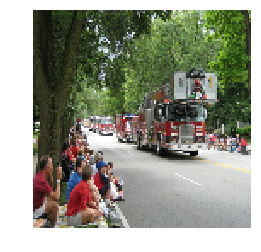

In [9]:
for i in run_session(data, 1):
    pass

Build train/test sets

In [10]:
split = 3 * len(data) // 4  # 3/4 of the data

train = data[split:]
test = data[:split]